# Ridge and Lasso Regression Implementation

### What is Ridge Regression?
Ridge Regression is a regularization technique for Linear Regression model to perform well in the scenarios where there is high variance as compared to the data which is used to train the model.

### What is Lasso Regression?
Lasso which means least absolute shrinkage and selection operator it performs both regularization and variable selection in the Lasso Regression techniques for enhancing the accuracy and the understanding of the statistical model produced by this course of action.

## Why Ridge & Lasso Regression is used ?
Ridge & Lasso Regression is used when in Linear regression the best fit line holds good for the tranning dataset 
but it doesn't show good fit at test dataset , to overcome this scenarios this Ridge & Lasso Regression come into action.


In [32]:
from sklearn.datasets import load_boston ## Using Boston dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [3]:
boston = load_boston() ## Importing Boston data
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston_df = pd.DataFrame(boston.data) ## Converting data into dataframe
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df.columns = boston.feature_names ## putting columns heading to the respecting columns

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston.target.shape # checking the target variable total rows size, so that we can add it to above df.

(506,)

In [8]:
boston_df.shape

(506, 13)

In [9]:
boston_df["Price"] = boston.target

In [10]:
boston_df.tail() ## Added traget Variable i.e Price into the Boston DF.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [11]:
boston_df.shape

(506, 14)

In [12]:
X = boston_df.iloc[ : , :-1] ## Independent Variable
y = boston_df.iloc[ : , -1]  ## Dependent Variable

In [13]:
X.shape

(506, 13)

In [14]:
y.shape

(506,)

# Multiple linear regression - least squares fitting

In [15]:
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression

In [16]:
lin_regress = LinearRegression()
MSE = cross_val_score(lin_regress,X,y,scoring = 'neg_mean_squared_error', cv = 5)
mean_MSE = np.mean(MSE)
print(mean_MSE)  ## Taking mean squared error

-37.13180746769922


# Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
para = {'alpha':np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 26, 1)))} ## taking different parameters

ridge_regress = GridSearchCV(ridge,para, scoring = 'neg_mean_squared_error', cv = 5 )
ridge_regress.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. , 25. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [18]:
print(ridge_regress.best_params_)
print(ridge_regress.best_score_)

{'alpha': 25.0}
-31.955265476667368


In [38]:
y_pred = ridge_regress.predict(X)

In [34]:
MSEs = np.sqrt(mean_squared_error(y,y_pred))
MSEs

4.788221474987936

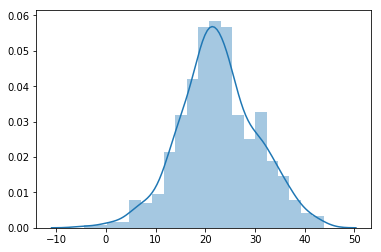

In [41]:
sns.distplot(y_pred)

# Lasso Regression

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [25]:
lasso=Lasso()
para = {'alpha':np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 26, 1)))}
lasso_regress =GridSearchCV(lasso,para,scoring='neg_mean_squared_error',cv=5)

In [26]:
lasso_regress.fit(X,y)

print(lasso_regress.best_params_)
print(lasso_regress.best_score_)

{'alpha': 0.30000000000000004}
-34.41016411714021


In [42]:
y_predict = lasso_regress.predict(X)

In [43]:
MSE = np.sqrt(mean_squared_error(y,y_predict))
MSE

4.856322569305422

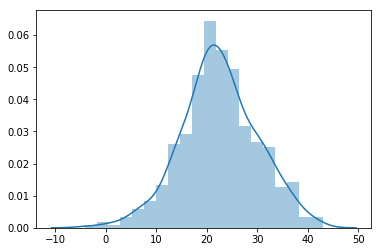

In [44]:
sns.distplot(y_predict)

### With this above regression models it found that "Ridge Regression model" shows better performance the other two regression models.